In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd


In [90]:
data = load_iris()

df = pd.DataFrame(data.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
def calculate_loss(X,Y,theta):

  return (1/(2*m))*np.sum((np.dot(X,theta.T)-Y)**2)

def calculate_gradient(t0,t1,X,theta,learning_rate):
  temp0 = (learning_rate/m)*np.sum(np.dot(X,theta.T)-Y) 
  temp1 = (learning_rate/m)*np.sum((np.dot(X,theta.T)-Y)*X)
  t0 -= temp0
  t1 -= temp1
  return t0,t1

def prepare_feature_matrix(df):
  X=df.sepal_length.iloc[0:50].values.reshape(50,1)
  Xnew=np.hstack((np.ones((50,1)),X))
  return Xnew

def prepare_target_vector(df):
  return df.sepal_width.iloc[0:50].values.reshape(50,1)

Theta: [[1.76405235 0.40015721]]


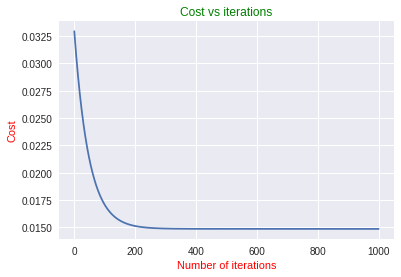

In [92]:

m,n=df.shape



X = prepare_feature_matrix(df)
Y = prepare_target_vector(df)


np.random.seed(0)
theta=np.random.randn(1,2)
print('Theta:',theta)

iters=1000
J=np.zeros(iters)
learning_rate=0.001

#training

for i in range(iters):
    J[i] = calculate_loss(X, Y, theta)
    theta[0,0], theta[0,1] = calculate_gradient(theta[0,0], theta[0,1], X, theta, learning_rate)

plt.plot(np.arange(iters),J)
plt.xlabel('Number of iterations',color='red')
plt.ylabel('Cost',color='red')
plt.title('Cost vs iterations',color='green')
plt.show()


Updated theta after Gradient Descent: [[1.7504434  0.33692062]]


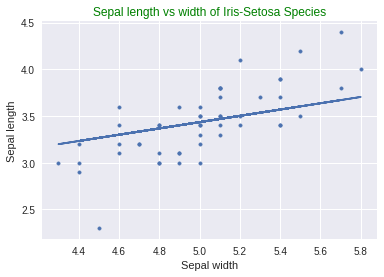

In [93]:
print('Updated theta after Gradient Descent:',theta)
plt.scatter(X[:,1],Y,marker='.')
plt.plot(X[:,1],np.dot(X,theta.T))
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green')
plt.show()